## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.3, 0.5, 0.7, 0.95]

In [7]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mom in MOMENTUM:
    lr = LEARNING_RATE
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-Momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Momentum = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

50000/50000 [==============================] - 6s 127us/step - loss: 1.2480 - accuracy: 0.5639 - val_loss: 1.4085 - val_accuracy: 0.4954
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2354 - accuracy: 0.5672 - val_loss: 1.3899 - val_accuracy: 0.5064
Epoch 50/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.2357 - accuracy: 0.5684 - val_loss: 1.4191 - val_accuracy: 0.4974
Experiment with Momentum = 0.300000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1732 - accuracy: 0.5888 - val_loss: 1.4825 - val_accuracy: 0.4833
Epoch 47/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.1668 - accuracy: 0.5915 - val_loss: 1.3783 - val_accuracy: 0.5129
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1596 - accuracy: 0.5933 - val_loss: 1.5032 - val_accuracy: 0.4759
Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.1525 - accuracy: 0.5973 - val_loss: 1.4289 - val_accuracy: 0.4856
Epoch 50/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.1440 - accuracy: 0.5996 - val_loss: 1.6026 - val_accuracy: 0.4606
Experiment with Momentum = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 6s 121us/step - loss: 1.1035 - accuracy: 0.6140 - val_loss: 1.3510 - val_accuracy: 0.5210
Epoch 44/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0993 - accuracy: 0.6122 - val_loss: 1.3831 - val_accuracy: 0.5207
Epoch 45/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0850 - accuracy: 0.6203 - val_loss: 1.4975 - val_accuracy: 0.4811
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0863 - accuracy: 0.6199 - val_loss: 1.4770 - val_accuracy: 0.4854
Epoch 47/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.0674 - accuracy: 0.6250 - val_loss: 1.5227 - val_accuracy: 0.4694
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0627 - accuracy: 0.6280 - val_loss: 1.4034 - val_accuracy: 0.5210
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0535 - accuracy: 0.6316 - val_loss:

50000/50000 [==============================] - 6s 123us/step - loss: 0.9700 - accuracy: 0.6613 - val_loss: 1.4613 - val_accuracy: 0.5077
Epoch 41/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9605 - accuracy: 0.6633 - val_loss: 1.3807 - val_accuracy: 0.5248
Epoch 42/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.9438 - accuracy: 0.6666 - val_loss: 1.8674 - val_accuracy: 0.4401
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.9373 - accuracy: 0.6722 - val_loss: 1.6858 - val_accuracy: 0.4534
Epoch 44/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9217 - accuracy: 0.6771 - val_loss: 1.8191 - val_accuracy: 0.4342
Epoch 45/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.9193 - accuracy: 0.6770 - val_loss: 1.5258 - val_accuracy: 0.4978
Epoch 46/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9001 - accuracy: 0.6861 - val_loss:

Epoch 38/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.5495 - accuracy: 0.8016 - val_loss: 1.7253 - val_accuracy: 0.5270
Epoch 39/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.5341 - accuracy: 0.8075 - val_loss: 1.8309 - val_accuracy: 0.5268
Epoch 40/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.5157 - accuracy: 0.8157 - val_loss: 1.8199 - val_accuracy: 0.5371
Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.4958 - accuracy: 0.8218 - val_loss: 1.8973 - val_accuracy: 0.5400
Epoch 42/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.4899 - accuracy: 0.8250 - val_loss: 1.8769 - val_accuracy: 0.5360
Epoch 43/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.4652 - accuracy: 0.8343 - val_loss: 1.9986 - val_accuracy: 0.5243
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.4480 - accuracy: 0.8390

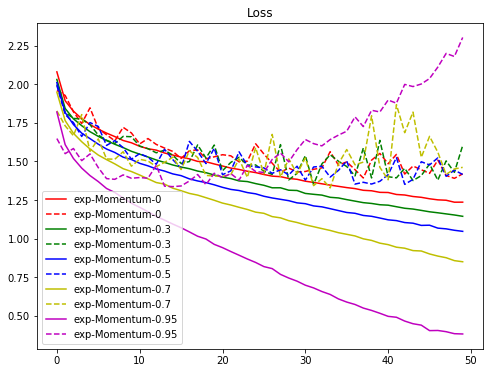

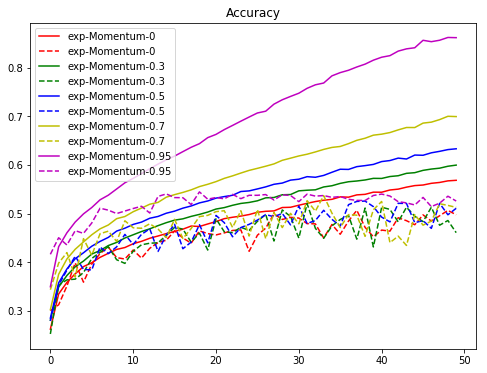

In [8]:

"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()